# HW8 Neural Networks
You can receive a maximum of 100 points for this HW.

### 1. Handwritten Digit Recognition

One of the most successful applications of neural networks is image processing. In recent years this application emerged in economic contexts as well, for example, the task of GDP prediction from satellite images or the processing of supermarket price flyers to compute price measurements.
Real life applications often have a sophisticated architecture and can be difficult to train. In this exercise we, therefore, focus on a very simple but very exciting image processing task - the handwritten digit recognition. We will use the MNIST dataset (http://yann.lecun.com/exdb/mnist/). Handwritten digit recognition on the MNIST dataset has become the "must-do" exercise for those who learn how to train neural networks. 


### 1. Data and Network Architecture
The code below uses the sklearn package to download the MNIST dataset. It noramalizes the data and finally visualizes 100 randomly selected pictures.

In [1]:
#If you don't have sklearn already installed run
#pip install sklearn

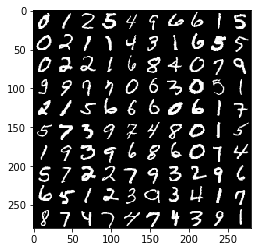

In [2]:
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.datasets import fetch_openml
import numpy as np

mnist = fetch_openml('mnist_784', version=1, cache=True)
mnist.target = mnist.target.astype(np.int8)  # fetch_openml() returns targets as strings

X = mnist['data']
X = X - X.mean()
X = X / X.std()
Y = mnist.target

#Visualisation
R = np.random.randint(0,70000,[100])
plt.imshow(X[R].reshape(10,10,28,28).transpose(0,2,1,3).reshape(10*28,10*28),cmap='gray')
plt.show()

The MNIST data consists of 70000 handwritten digits of 28x28 pixels, stored in a matrix X of size 70000x784. Each row of X represents one image, each entry in this row contains the grayscale intensity of a corresponding pixel.

In [3]:
X.shape

(70000, 784)

We will use a three-layer neural network (an input layer, a hidden layer and an output layer) with 25 hidden units and sigmoid activation functions. Since the images are of size $28 \times 28$, this gives us 784 input layer units (not counting the extra bias unit which always outputs +1).

In [4]:
#Set up the network
d = 784   # 28x28 input of digits for 28x28 pixels
H = 25    # 25 hidden units
K = 10    # 10 labels, from 0 to 9


### 1.1. Creating labels
Currently Y is a vector that contains the digits displayed on the corresponding images (say Y[1] = 0 because the second image is an image of the digit "0"). Represent Y as an $M \times K$-dimensional matrix. In each row there should be a 1 on the k-th position and 0s everywhere else (say if Y[1] = 0 then Y[1,:] should become [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]) (20 points).

### 1.2 Loss Function for NN
Write a function that implements the regularized loss function for a neural network. For this you would need to implement a forward pass:

-append a vector of 1's to X, compute $Z=X \Theta^{1}$, and $A=\sigma(Z)$

-append a vector of 1's to A, compute $Z^3 = A \Theta^2$, and $f_{\theta} = \sigma(Z^3)$

I recommend using a list that would contain and pass around the matrices of parameters $\Theta^1$ and $\Theta^2$. Remember that the first row of Theta matrices should not be added in the regularization term. Set the default value of lambda to 1. 

You can assume that the network has 3 layers. However, the number of units in the input and hidden layers should not be fixed (30 points).

In [5]:
def labels(Y, number_of_labels):

    M = len(Y)
    Y_matrix = np.zeros((M, number_of_labels)) #create a zero-matrix of the desired size 
    
    for i in range(M):
        
        Y_matrix[i, Y[i]] = 1 #only change the corresponding entry to one
        
    return Y_matrix

def sigmoid(x):

    return np.divide(np.ones(x.shape), 1 + np.exp(-1 * x))
    
def nn_loss(Theta_list, X, Y, lambd=1):
    #put you code here
    M = len(X)
    (H, K) = Theta_list[1].shape #actually H = H - 1 
    
    #We start by calculating f_theta
    X = np.insert(X, 0, 1, axis = 1)
    Z_1 = np.dot(X, Theta_list[0])
    A = sigmoid(Z_1)
    A = np.insert(A, 0, 1, axis = 1)        
    Z_3 = np.dot(A, Theta_list[1])
    f_theta = sigmoid(Z_3)
                
    #print(f'f_theta: {f_theta}. A: {A}. Z_1: {Z_1}. Z_3: {Z_3}.')
            
    #Now for the rest of the loss function
    
    temp1 = np.multiply(Y, np.log(f_theta))
    temp2 = np.multiply(np.ones(Y.shape)-Y, np.log(np.ones(Y.shape) - f_theta))
    
    #print(temp2)
    #print()
    theta_1 = np.delete(Theta_list[0], (0), axis = 0)
    theta_2 = np.delete(Theta_list[1], (0), axis = 0)
    #print(theta_1.shape)
    temp3 = np.sum(np.multiply(theta_1, theta_1))
    temp4 = np.sum(np.multiply(theta_2, theta_2))
    
    J = -1/M*np.sum(temp1 + temp2) + lambd/(2*M)*(temp3 + temp4)
    
    return J

Y_matrix = labels(Y, K)


### 2. Training the Network with Backpropagation

### 2.1. Sigmoid gradient
Implement the function sigmoid_gradient which computes the gradient of the sigmoid. For a matrix the function should compute the sigmoid gradient for every element (10 points).


### 2.2 Randomly initialize all parameter matrices at values in [$-\epsilon;\epsilon]$
Use np.random.rand(s) that would create a matrix with values in [0,1) of a shape s. Adjust the function such that each parameter is between -0.12 and 0.12 (10 points).



### 2.3. Error back propagation
Implement the function nn_backprop that returns two matrices with gradients. First compute the forward pass then compute the backward pass (30 points):

3.1. $\delta^3 = f_{\theta}(x) - Y$

3.2. $\delta^2 = \delta^3 \cdot \Theta^2.T * \sigma'(z^2)$, where * indicates element-wise multiplication and T indicates transpose.
Remove the first column.

3.3. Compute derivative matrices:
$D^{(l)} = A^{(l)}.T \cdot \delta^{(l+1)}$ 


3.4 Finally the derivative for GD update is:

for $\Theta^2$: $\frac{1}{m} D^2 + \frac{\lambda}{m} \tilde{\Theta^2}$, where in $\tilde{\Theta^2}$ the first row is zeroed.


for $\Theta^1$: $\frac{1}{m} D^1 + \frac{\lambda}{m} \tilde{\Theta^1}$, where in $\tilde{\Theta^1}$ the first row is zeroed.


In [6]:
#Backprop

def sigmoid_gradient(A):
    
    sigmoid_grad_A = np.divide(np.exp(A), np.multiply(1 + np.exp(A), 1 + np.exp(A)))
    
    return sigmoid_grad_A


Theta1_init = np.random.rand(d + 1, H)*0.24 - np.ones((d + 1, H))*0.12 
Theta2_init = np.random.rand(H + 1, K)*0.24 - np.ones((H + 1, K))*0.12 

def nn_backprop(Theta_list, X, Y, lambd=1):
    
    M = len(X)
    (H, K) = Theta_list[1].shape #actually H = H - 1 
    
    #We start by calculating f_theta
    X = np.insert(X, 0, 1, axis = 1)
    Z_1 = np.dot(X, Theta_list[0])
    A = sigmoid(Z_1)
    A = np.insert(A, 0, 1, axis = 1)
    Z_3 = np.dot(A, Theta_list[1])
    f_theta = sigmoid(Z_3)
            
    
    delta_3 = f_theta - Y
    theta_2 = np.delete(Theta_list[1], (0), axis = 0)
    delta_2 = np.multiply(np.dot(delta_3, np.transpose(theta_2)), sigmoid_gradient(Z_1)) #np.multiply(Z_1, Z_1)
    
    
    D_2 = np.dot(np.transpose(A), delta_3)
    D_1 = np.dot(np.transpose(X), delta_2)
    
    theta_1_tilde = Theta_list[0]
    theta_1_tilde[0,:] = 0
    theta_2_tilde = Theta_list[1]
    theta_2_tilde[0,:] = 0
    
    #print(f'delta_3 size {delta_3.shape}. delta_2 size {delta_2.shape}')
    
    Grad1 = (1/M)*D_1 + (lambd/M)*theta_1_tilde
    Grad2 = (1/M)*D_2 + (lambd/M)*theta_2_tilde
    
    return Grad1, Grad2



### 2.4. Learning Optimal Parameters
Run the optimization code below. If you did not implement nn_loss or nn_backprop, load the optimal parameters from Theta1.csv and Theta2.csv by the code down below.

In [7]:
from scipy import optimize

options= {'maxiter': 100}
lambd = 1
#Define a new loss function with flattened parameters
def nn_loss_for_optimize(params, input_size, hidden_size, output_size,
                         X,Y, lambd):
    
    #Reshape parameters and put into list
    Theta1 = np.reshape(params[:hidden_size * (input_size + 1)],
                        (input_size + 1, hidden_size))

    Theta2 = np.reshape(params[(hidden_size * (input_size + 1)):],
                        (hidden_size + 1,output_size)) 
    Theta = [Theta1, Theta2]
    
    J = nn_loss(Theta, X, Y, lambd)
    G1,G2 =  nn_backprop(Theta, X, Y, lambd)
    grad = np.concatenate([G1.ravel(), G2.ravel()])
    
    return J, grad

# flattened array of parameters
params = np.concatenate([Theta1_init.ravel(), Theta2_init.ravel()], axis=0)

#Run optimization
res = optimize.minimize(nn_loss_for_optimize,
                        params,
                        args = (d,H, K, X, Y_matrix,1),
                        jac = True,
                        method='TNC',
                        options=options)

#Reshape parameter matrices back 
params_star = res.x
Theta1 = np.reshape(params_star[:H * (d + 1)],(d + 1, H))
Theta2 = np.reshape(params_star[(H * (d + 1)):],(H + 1,K)) 

print('Done!')

Done!


In [8]:
# #Alternative
#import pandas as pd

#Theta1 = pd.read_csv("Theta1_opt.csv", index_col=0).to_numpy()
#Theta2 = pd.read_csv("Theta2_opt.csv", index_col=0).to_numpy()

### 2.5. What features does NN learn
For each of the hidden layer neurons, there are 784 first-layer weights that are connected to it. They can be visualized as a pixel image. The following code shows these images for all 25 hidden neurons. All 28x28 images are displayed in a mosaic of 5x5 tiles. These images show what "masks" are applied to images to compute each hidden unit or in other words what regions of the image are important for a particular feature represented by a hidden unit. Commend on the features that the neural networks learns (10 points).

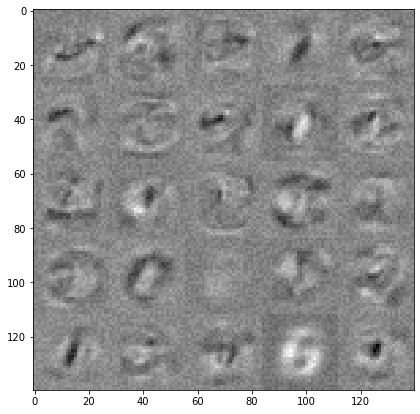

In [9]:
plt.figure(figsize=(7,7))
plt.imshow(Theta1[1:,:].reshape(28,28,5,5).transpose(2,0,3,1).reshape(28*5,28*5),cmap='gray')
plt.show()

### 2.6. Prediction and model accuracy
Write the function predict that predicts the label for a given image. Run the function on all examples in the data and compute the in-sample accuracy (10 points).

In [11]:
def nn_predict(Theta1, Theta2, X):
    
    X = np.insert(X, 0, 1)
    temp1 = np.dot(X, Theta1)
    n = len(temp1)
    
    for i in range(n):
        temp1[i] = sigmoid(temp1[i])
            
    temp2 = np.dot(np.insert(temp1, 0 , 1), Theta2)
    m = len(temp2)
    
    for i in range(m):
        temp2[i] = sigmoid(temp2[i])
        
    prediction = np.argmax(temp2)
    
    return [prediction] 

correct_counter = 0
for k in range(len(X)):
    
    if nn_predict(Theta1, Theta2, X[k]) == Y[k]:
        correct_counter += 1
        
correct_percent = round(100*correct_counter/len(X), 2)

print(f'Our algorithm classifies {correct_percent} percent of the instances correctly.')

Our algorithm classifies 93.05 percent of the instances correctly.


### Not an exercise
The code below picks a random example from the data and shows its image together with the prediction. Try it out!

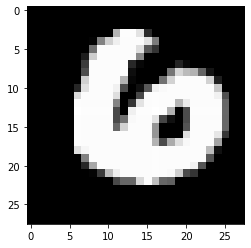

NN predicitons: 6


In [14]:
i = np.random.randint(0,70000,[1])
plt.figure()
plt.imshow(X[i].reshape(1,1,28,28).transpose(0,2,1,3).reshape(1*28,1*28),cmap='gray')
plt.show()


print('NN predicitons: '+ str(nn_predict(Theta1, Theta2, X[i])[0]))